In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("BMW_Car_Sales_Classification.csv")

In [7]:
df

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low
...,...,...,...,...,...,...,...,...,...,...,...
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,High
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,High
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,High
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486,High


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [9]:
df["Sales_Classification"].unique()

array(['High', 'Low'], dtype=object)

In [10]:
mapping = {"High":1, "Low":0}
df["Sales_Classification"] = df["Sales_Classification"].map(mapping)

In [11]:
df

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,1
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,0
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,0
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,0
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,0
...,...,...,...,...,...,...,...,...,...,...,...
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,1
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,1
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,1
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486,1


In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
class DataPreprocessing:
    def __init__(self, df):
        self.df = df 
        
        

    def tozala(self):
        for col in self.df.columns:
            if self.df[col].isnull().any():
                if self.df[col].dtype == 'object':
                    self.df[col] = self.df[col].fillna(self.df[col].mode()[0])
                else:
                    self.df[col] = self.df[col].fillna(self.df[col].mean())
        return self

    def encodla(self):
        self.encoder = LabelEncoder()
        for col in self.df.columns:
            if self.df[col].dtype == 'object':
                if self.df[col].nunique() <= 6:
                    dummies = pd.get_dummies(self.df[col], prefix=col, dtype=int)
                    self.df = pd.concat([self.df.drop(columns=[col]), dummies], axis=1)
                else:
                    self.df[col] = self.encoder.fit_transform(self.df[col])
        return self

    def scaling_qil(self):
        self.scaler = StandardScaler()
        numeric_cols = self.df.select_dtypes(include=['int64', 'float64']).columns.drop("Sales_Classification")
        self.df[numeric_cols] = self.scaler.fit_transform(self.df[numeric_cols])
        return self
     

    def get_df(self):
        return self.df
    

In [13]:
prep = DataPreprocessing(df)
prep.tozala().encodla().scaling_qil
cleaned_df = prep.get_df()

In [14]:
cleaned_df

,Model,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Region_Africa,Region_Asia,Region_Europe,Region_Middle East,Region_North America,Region_South America,Color_Black,Color_Blue,Color_Grey,Color_Red,Color_Silver,Color_White,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,1,2016,3.5,151748,98740,8300,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1,10,2013,1.6,121671,79219,3428,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
2,1,2022,4.5,10991,113265,6994,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0
3,6,2024,1.7,27255,60971,4047,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0
4,2,2020,2.1,122131,49898,3080,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,9,2014,4.6,151030,42932,8182,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
49996,9,2023,4.2,147396,48714,9816,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1
49997,1,2010,4.5,174939,46126,8280,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0
49998,9,2020,3.8,3379,58566,9486,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0


In [14]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Model                   50000 non-null  int64  
 1   Year                    50000 non-null  int64  
 2   Engine_Size_L           50000 non-null  float64
 3   Mileage_KM              50000 non-null  int64  
 4   Price_USD               50000 non-null  int64  
 5   Sales_Volume            50000 non-null  int64  
 6   Sales_Classification    50000 non-null  int64  
 7   Region_Africa           50000 non-null  int64  
 8   Region_Asia             50000 non-null  int64  
 9   Region_Europe           50000 non-null  int64  
 10  Region_Middle East      50000 non-null  int64  
 11  Region_North America    50000 non-null  int64  
 12  Region_South America    50000 non-null  int64  
 13  Color_Black             50000 non-null  int64  
 14  Color_Blue              50000 non-null

In [15]:
cleaned_df.to_csv("Data_preprocessing.csv", index=False)

In [16]:
df = pd.read_csv("Data_preprocessing.csv")

In [17]:
df

,Model,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Region_Africa,Region_Asia,Region_Europe,Region_Middle East,Region_North America,Region_South America,Color_Black,Color_Blue,Color_Grey,Color_Red,Color_Silver,Color_White,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,1,2016,3.5,151748,98740,8300,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1,10,2013,1.6,121671,79219,3428,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
2,1,2022,4.5,10991,113265,6994,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0
3,6,2024,1.7,27255,60971,4047,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0
4,2,2020,2.1,122131,49898,3080,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,9,2014,4.6,151030,42932,8182,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
49996,9,2023,4.2,147396,48714,9816,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1
49997,1,2010,4.5,174939,46126,8280,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0
49998,9,2020,3.8,3379,58566,9486,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0


In [18]:
x = df.drop("Sales_Classification", axis=1)
y = df["Sales_Classification"]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

In [22]:
logistic_model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [24]:
logistic_model.fit(x_train, y_train)

C:\Users\IT-PARK\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [31]:
logistic_pred = logistic_model.predict(x_test)

In [32]:
logistic_pred

array([1, 1, 0, ..., 0, 1, 0], shape=(5000,))

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
logistic_score = accuracy_score(y_test,logistic_pred)

In [35]:
logistic_score

0.9992

In [36]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()

In [37]:
tree_model

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [38]:
tree_model.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [39]:
tree_pred = tree_model.predict(x_test)

In [40]:
tree_pred

array([1, 1, 0, ..., 0, 1, 0], shape=(5000,))

In [41]:
tree_score = accuracy_score(y_test, tree_pred)

In [42]:
tree_score

1.0

In [47]:
from sklearn.ensemble import RandomForestClassifier
random_model = RandomForestClassifier()

In [48]:
random_model

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [50]:
random_model.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [51]:
ensemble_pred = random_model.predict(x_test)

In [52]:
ensemble_pred

array([1, 1, 0, ..., 0, 1, 0], shape=(5000,))

In [54]:
ensemble_score = accuracy_score(y_test, ensemble_pred)

In [55]:
ensemble_score

1.0

C:\Users\IT-PARK\AppData\Local\Temp\ipykernel_16024\449924800.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accurasies, palette="viridis")


<function matplotlib.pyplot.show(close=None, block=None)>

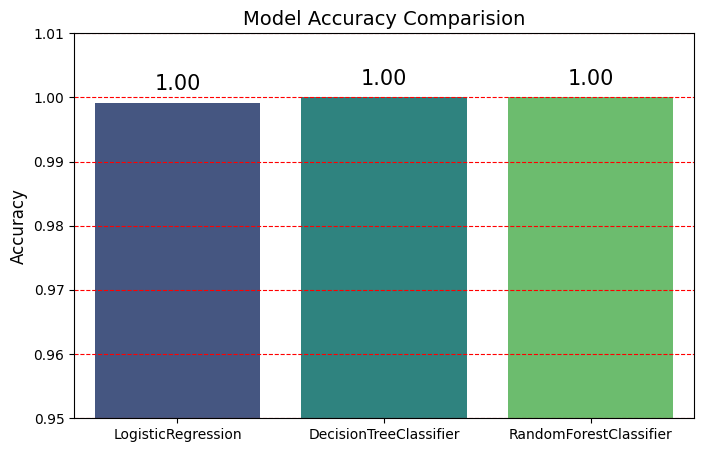

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns


model_names = ["LogisticRegression", "DecisionTreeClassifier", "RandomForestClassifier"]
accurasies = [0.9992, 1.0, 1.0]
plt.figure(figsize=(8,5))
sns.barplot(x=model_names, y=accurasies, palette="viridis")


plt.title("Model Accuracy Comparision", fontsize = 14)
plt.ylabel("Accuracy", fontsize = 12)
plt.ylim(0.95,1.01)
plt.grid(axis="y", linestyle="--", alpha = 1, color = "red")


for i,acc in enumerate(accurasies):
    plt.text(i, acc + 0.002, f"{acc:.2f}", ha = "center", fontsize=15)
plt.show